In [1]:
from Modules.Kernel_Autoencoder import *
from Modules.Manifolds import *
from sklearn.neighbors import kneighbors_graph

### Create test and train sets

In [2]:
points_train, color_train, points_test, color_test = create_test_train_sets(dataset="Swiss Roll", n_samples_train=1000, n_samples_test=500, hole=False, dimensions=3)

### Find Embeddings based on manifold learning algorithms

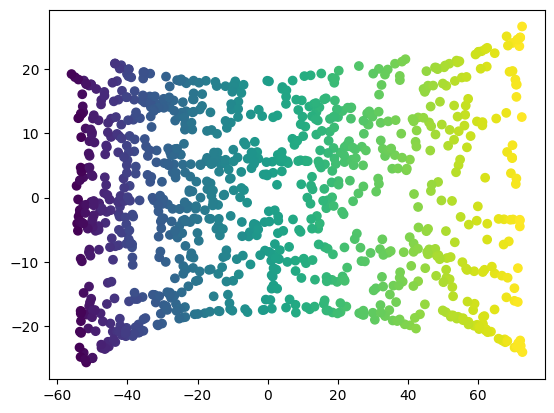

In [3]:
embedding = create_embedding(points_train, color_train, neighbours=12, components=2, method="Isomap", plot=True)

#### Standardize data

In [4]:
from sklearn.preprocessing import StandardScaler

# Center the data
mean = np.mean(points_train, axis=0)
points_train = points_train - mean
points_test = points_test - mean

# Standardize the centered data
scaler = StandardScaler()
points_train = scaler.fit_transform(points_train)
points_test = scaler.transform(points_test)

### Compute reconstruction

In [5]:
# Compute the K-nearest neighbor graph
k = 6 # Number of nearest neighbors
A = kneighbors_graph(points_train, n_neighbors=k, mode='connectivity', include_self=False)

# Convert the adjacency matrix to a dense matrix
similiarity_graph = A.toarray()

# similiarity_graph = find_similiarity_map(N=len(points_train), Y=points_test, num_similar_samples=6)
X_train_encoding, X_test_encoding = enocder(points_train, points_test, layer_width=1500, activation="tanh", param_sampler="tanh")

Za, Za_test = find_embedding(similiarity_graph, X_train_encoding, X_test_encoding, encoding_dim=2)

X_train_reconstruct, X_test_reconstruct = decoder(Za, Za_test, points_train, layer_width=1500, activation="tanh", param_sampler="tanh")


D:\Thesis\Thesis_Sampling_weights_in_Autoencoders\Autoencoder_Experiments_and_Results\Modules\Kernel_Autoencoder.py:105: UserWarning: Exited at iteration -1 with accuracies 
[109.28102183 552.11548406]
not reaching the requested tolerance 0.01.
Use iteration 0 instead with accuracy 
330.6982529425128.

  eigenvalues, eigenvectors = lobpcg(LH, X=X_initial_guess, B=RH, largest=True, maxiter=-1, tol=0.01)
D:\Thesis\Thesis_Sampling_weights_in_Autoencoders\Autoencoder_Experiments_and_Results\Modules\Kernel_Autoencoder.py:105: UserWarning: Exited postprocessing with accuracies 
[109.28102183 552.11548406]
not reaching the requested tolerance 0.01.
  eigenvalues, eigenvectors = lobpcg(LH, X=X_initial_guess, B=RH, largest=True, maxiter=-1, tol=0.01)


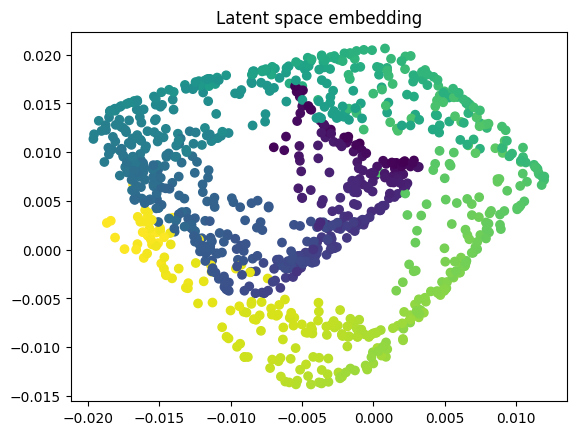

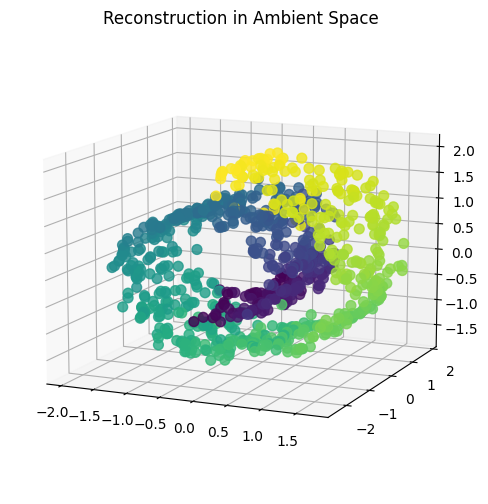

In [6]:
plot_latent_space(Za, color_train)
plot_reconstruction(X_train_reconstruct, color_train)